# Liner Regression Model From Scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def initialize_parameters(lenw):#başlangıç parametreleri
    w=np.random.randn(lenw)
    #w=np.zeros((1,lenw))
    b=0
    return w,b

In [3]:
def forward_prop(X,w,b): #w-->1xn, X-->n x m
    z=np.dot(w,X)+b #z-->1 x m   b=[b b b ....]
    return z

In [4]:
#maliyet fonksiyonu
def cost_function(z,y):
    m = y.shape[1]
    J=(1/(2*m))*np.sum(np.square(z-y))
    return J

In [5]:
def back_prop(X,y,z):
    m=y.shape[1]
    dz=(1/m)*(z-y)
    dw=np.dot(dz,X.T)  #dw-->1 x n
    db = np.sum(dz)
    return  dw,db

In [6]:
def gradient_descent_update(w,b,dw,db,learning_rate):  #degraate iniş güncellemesi
    w = w - learning_rate*dw
    b = b - learning_rate*db
    return w,b
    

In [7]:
# Lineer regresyon modeli
def linear_regression_model(X_train, y_train, X_val, y_val, learning_rate, epochs):
    lenw = X_train.shape[0]
    w, b = initialize_parameters(lenw)
    
    costs_train = []  # Eğitim maliyetlerini saklamak için bir liste oluştur
    
    m_train = y_train.shape[1]
    m_val = y_val.shape[1]

    for i in range(1, epochs + 1):
        z_train = forward_prop(X_train, w, b)
        cost_train = cost_function(z_train, y_train)
        dw, db = back_prop(X_train, y_train, z_train)
        w, b = gradient_descent_update(w, b, dw, db, learning_rate)
        
        if i % 10 == 0:
            costs_train.append(cost_train)
        
        MAE_train = (1 / m_train) * np.sum(np.abs(z_train - y_train))
        
        z_val = forward_prop(X_val, w, b)
        cost_val = cost_function(z_val, y_val)
        MAE_val = (1 / m_val) * np.sum(np.abs(z_val - y_val))
        
        #print('Epochs  ' + str(i) + '/' + str(epochs) + ' : ')
        #print('Training cost ' + str(cost_train) + ' | ' + 'Validation cost  ' + str(cost_val))
        #print('Training MAE ' + str(MAE_train) + ' | ' + 'Validation MAE  ' + str(MAE_val))
        
    print("")
    print('Training cost ' + str(cost_train) + ' | ' + 'Validation cost  ' + str(cost_val))
    print('Training MAE ' + str(MAE_train) + ' | ' + 'Validation MAE  ' + str(MAE_val))

    # Eğitim maliyetini grafik üzerinde göster
    plt.plot(costs_train)
    plt.xlabel('Iterations [per_tens]')
    plt.ylabel('Training Cost')
    plt.title('Learning rate ' + str(learning_rate))
    plt.show()
    
    
    
    

In [8]:
dataset = pd.read_csv('dataset_Facebook.csv', delimiter=';')
data = dataset.copy()

In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [10]:
#Paid sütununda tespit edilen boş değerleri o sütunun ortalaması ile dolduruluyor
mean_value= data['Paid'].mean()#
data['Paid'].fillna(mean_value,inplace=True)


#like sütununda tespit edilen boş değerleri o sütunun ortalaması ile dolduruluyor@114.satır
mean_value= data['like'].mean()#
data['like'].fillna(mean_value,inplace=True)

#like sütununda tespit edilen boş değerleri o sütunun ortalaması ile dolduruluyor
mean_value= data['share'].mean()#
data['share'].fillna(mean_value,inplace=True)



In [11]:
X = dataset[['Category', 'Page total likes', 'Post Month', 'Post Hour', 'Post Weekday', 'Paid']]
y = dataset['Total Interactions']

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 500 non-null    float64
 7   Lifetime

In [13]:
X.shape

(500, 6)

In [14]:
data.drop(["Type"], axis = 1, inplace = True)

In [15]:
#Normalize input matrix so that data lies in the range of -1 yo +1
X= (data-data.mean())/(data.max()-data.min())

In [16]:
#describe() fonksiyonu, bir Pandas DataFrame veya Serisi'nin temel istatistik özetini sağlar.

In [17]:
X.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,500.000000,5.000000e+02,5.000000e+02,500.000000,5.000000e+02,5.000000e+02,5.000000e+02
mean,-1.136868e-16,6.039613e-17,-5.684342e-17,-5.950795e-17,8.881784e-18,1.776357e-17,-1.776357e-18,0.000000,-5.329071e-18,-4.440892e-18,-6.217249e-18,0.000000,-7.105427e-18,3.996803e-18,0.000000,4.440892e-19,8.881784e-19,-6.661338e-19
std,2.802227e-01,4.263373e-01,3.007215e-01,3.384502e-01,1.985722e-01,4.482890e-01,1.261681e-01,0.069210,8.608028e-02,7.796669e-02,1.011934e-01,0.053999,1.499807e-01,1.403081e-01,0.056938,6.246607e-02,5.372425e-02,6.003049e-02
min,-7.202248e-01,-4.400000e-01,-5.489091e-01,-5.250000e-01,-3.109091e-01,-2.785571e-01,-7.581674e-02,-0.026147,-7.964205e-02,-6.977401e-02,-7.112443e-02,-0.014630,-1.239650e-01,-1.376199e-01,-0.020113,-3.440562e-02,-3.451409e-02,-3.348911e-02
25%,-1.811261e-01,-4.400000e-01,-2.761818e-01,-3.583333e-01,-2.200000e-01,-2.785571e-01,-5.874524e-02,-0.021529,-4.601888e-02,-4.119375e-02,-4.582094e-02,-0.011557,-8.598180e-02,-7.304465e-02,-0.017425,-2.343308e-02,-2.185586e-02,-2.227976e-02
50%,1.103102e-01,6.000000e-02,-3.454545e-03,-2.500000e-02,5.272727e-02,-2.785571e-01,-4.783768e-02,-0.018505,-2.576632e-02,-2.184575e-02,-2.853465e-02,-0.009493,-6.186037e-02,-4.533684e-02,-0.012048,-1.487740e-02,-1.046345e-02,-1.399116e-02
75%,2.272877e-01,5.600000e-01,2.692727e-01,3.083333e-01,1.436364e-01,7.214429e-01,-4.079848e-03,-0.006759,1.237927e-02,1.384645e-02,2.421345e-03,-0.001721,2.740164e-02,1.059400e-02,-0.001296,1.798938e-03,5.992242e-03,2.586044e-03
max,2.797752e-01,5.600000e-01,4.510909e-01,4.750000e-01,6.890909e-01,7.214429e-01,9.241833e-01,0.973853,9.203579e-01,9.302260e-01,9.288756e-01,0.985370,8.760350e-01,8.623801e-01,0.979887,9.655944e-01,9.654859e-01,9.665109e-01


In [18]:
y.shape

(500,)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2,random_state=5)


In [21]:
X_train.shape

(400, 18)

In [22]:
#our model needs X_taring of dimension(number_features x number_training_examples)
X_train=X_train.T

In [23]:
X_train.shape

(18, 400)

In [24]:
y_train.shape

(400,)

In [25]:
#we need y_train of dimension 1 x m_train where m_train = number of training examples
y_train = np.array([y_train])

In [26]:
y_train.shape

(1, 400)

In [27]:
#our model needs X_validation of dimension (number_features x number_validation_examples)
X_val = X_val.T

In [28]:
X_val.shape

(18, 100)

In [29]:
#we need y_val of dimension 1 x m_val where m_val = number of training example
y_val=np.array([y_val])

In [30]:
y_val.shape

(1, 100)

# Feeding prepared dataset in our Linear Regression Model


Training cost 2341.3417663626465 | Validation cost  2756.9421763302444
Training MAE 40.673025825692875 | Validation MAE  39.28531545966194


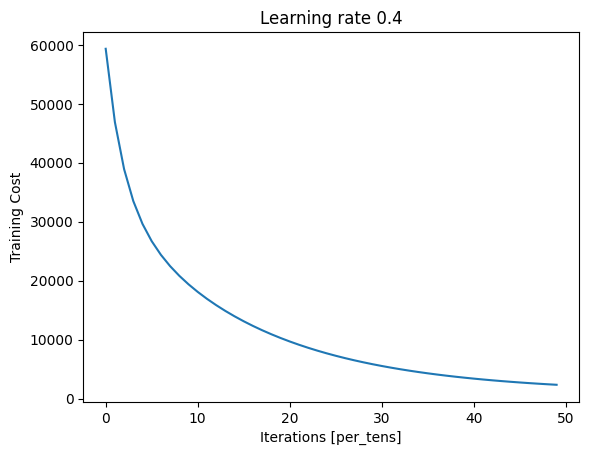

In [31]:
linear_regression_model(X_train,y_train,X_val,y_val,0.4,500)

In [32]:
from sklearn import linear_model

In [33]:
linear_regression = linear_model.LinearRegression()
model= linear_regression.fit(X_train.T,y_train.T)
predictions = linear_regression.predict(X_val.T)


In [34]:
predictions.shape

(100, 1)

In [35]:
MAE_val_with_sklearn = (1/y_val.shape[1])*np.sum(np.abs(predictions-y_val.T))

In [36]:
MAE_val_with_sklearn

3.497291345411213e-13

Text(0.5, 1.0, 'Actual vs. Predicted Values for Linear Regression')

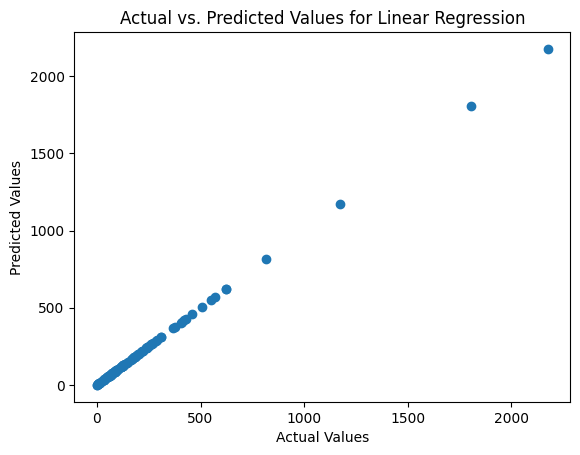

In [37]:
plt.scatter(y_val, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Linear Regression')


In [16]:
import pandas as pd

datasett = pd.read_csv('dataset_Facebook.csv', delimiter=';')
data = datasett.copy()

mean_value = data['Paid'].mean()
data['Paid'].fillna(mean_value, inplace=True)

mean_value = data['like'].mean()
data['like'].fillna(mean_value, inplace=True)

mean_value = data['share'].mean()
data['share'].fillna(mean_value, inplace=True)

one_hot_encoded = pd.get_dummies(data['Type'], prefix='Type')
data = pd.concat([data, one_hot_encoded], axis=1)

data['Type_Link'] = data['Type_Link'].astype(int)
data['Type_Photo'] = data['Type_Photo'].astype(int)
data['Type_Status'] = data['Type_Status'].astype(int)
data['Type_Video'] = data['Type_Video'].astype(int)

data.drop(["Type"], axis=1, inplace=True)

data.head()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,...,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Type_Link,Type_Photo,Type_Status,Type_Video
0,139441,2,12,4,3,0.0,2752,5091,178,109,...,1640,119,4,79.0,17.0,100,0,1,0,0
1,139441,2,12,3,10,0.0,10460,19057,1457,1361,...,6112,1108,5,130.0,29.0,164,0,0,1,0
2,139441,3,12,3,3,0.0,2413,4373,177,113,...,1503,132,0,66.0,14.0,80,0,1,0,0
3,139441,2,12,2,10,1.0,50128,87991,2211,790,...,32048,1386,58,1572.0,147.0,1777,0,1,0,0
4,139441,2,12,2,3,0.0,7244,13594,671,410,...,3200,396,19,325.0,49.0,393,0,1,0,0
